In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
%matplotlib inline

In [21]:
L = 0.985

In [22]:
data = pd.DataFrame({'v': pd.Series([60, 80, 100, 110, 70, 90]), 
                     'd': pd.Series([11, 14.5, 18, 20, 12.5, 16])})

In [23]:
data['v'] = data['v']*1e+6
data['d'] = data['d']*1e-3

In [24]:
data['sinO'] = data['d']/np.sqrt(L**2 + data['d']**2)

In [25]:
data

,d,v,sinO
0,0.0110,60000000.0,0.011167
1,0.0145,80000000.0,0.014719
2,0.0180,100000000.0,0.018271
3,0.0200,110000000.0,0.020300
4,0.0125,70000000.0,0.012689
5,0.0160,90000000.0,0.016242


Тангенс угла наклона - 1.8267233450276634e-10


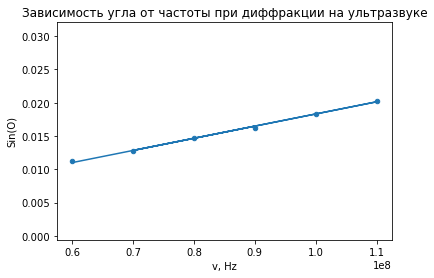

In [26]:
plt.figure()
p = np.polyfit(data['v'], data['sinO'], 1)
z = np.poly1d(p)
ax = data.plot(x='v', y='sinO', kind='scatter', title='Зависимость угла от частоты при диффракции на ультразвуке')
plt.plot(data['v'], z(data['v']))
ax.set_xlabel('v, Hz')
ax.set_ylabel('Sin(O)')
print('Тангенс угла наклона - {}'.format(p[0]))

In [27]:
lyambda = 0.6328*1e-6
print(('Скорость звука равна {} м/с').format(1/(p[0]*(2/lyambda))))

Скорость звука равна 1732.0630453496972 м/с


### Определение эффективности

In [28]:
data['I(-1)'] = pd.Series([2, 1.5, 2, 2, 2.2, 2])
data['I(0)'] = pd.Series([8, 9, 9, 9, 9, 9])
data['j'] = pd.Series([100, 77, 97, 80, 85, 100])
data['j'] = data['j']*1e-3
data['U'] = pd.Series([13, 15.7, 17.3, 19.2, 18.9, 17.9])
data['I(-1)/I(0)'] = data['I(-1)']/data['I(0)']
data['P'] = data['j']*data['U']

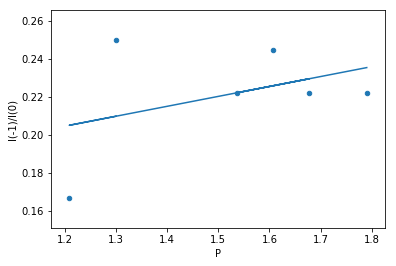

In [29]:
plt.figure()
data.plot(y = 'I(-1)/I(0)', x = 'P' , kind = 'scatter')
z1 = np.poly1d(np.polyfit(data['P'], data['I(-1)/I(0)'], 1))
plt.plot(data['P'], z1(data['P']))

In [30]:
n = np.polyfit(data['P'], data['I(-1)/I(0)'], 1)[0]

In [31]:
print('Потери равны n = {}'.format(n.round(4)))

Потери равны n = 0.0522


### Определение рабочих потерь

In [71]:
M2 = 3.6*1e-10#Cm^2/Вт
H = 0.25 #cм
L = 0.1 #cм
N = 2.38

In [74]:
Pa = data['I(-1)/I(0)'].mean()*(2*H/(L*M2))*((lyambda*1e2)**2*N**2*(1-(data['sinO'].mean())**2))/np.pi**2

In [80]:
Pa

7.0619320355873985

In [77]:
W = -10*np.log10(data['P'].mean()/Pa)

In [79]:
print('Рабочие потери равны {} децибел'.format(W))

Рабочие потери равны 6.671037562862365 децибел
